##**Import Libraries**

We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, please see source at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay 

In [2]:
creditdata=pd.read_csv('credit.csv')
creditdata.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
creditdata.shape

(1000, 17)

In [4]:
creditdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [5]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

###**Converting Objects to categorical variables**

In [6]:
for feature in creditdata.columns:
  if creditdata[feature].dtype=='object':
    creditdata[feature]=pd.Categorical(creditdata[feature])


In [7]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [8]:
print(creditdata.checking_balance.value_counts())
print(creditdata.credit_history.value_counts())
print(creditdata.purpose.value_counts())
print(creditdata.savings_balance.value_counts())
print(creditdata.employment_duration.value_counts())
print(creditdata.other_credit.value_counts())
print(creditdata.housing.value_counts())
print(creditdata.job.value_counts())
print(creditdata.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [9]:
replacing_cat_columns_data={
    "checking_balance":{"unknown":-1,"< 0 DM":1,"1 - 200 DM":2,"> 200 DM":3},
    "credit_history":{"critical":1,"poor":2,"good":3,"very good":4,"perfect":5},
    "employment_duration":{"unemployed":1,"< 1 year":2,"1 - 4 years":3,"4 - 7 years":4,"> 7 years":5},
    "phone":{"no":1,"yes":2},
    "default":{"no":0,"yes":1},
    "savings_balance":{"unknown":-1,"< 100 DM":1,"100 - 500 DM":2,"500 - 1000 DM":3,"> 1000 DM":4}
}
oneHotCols=['job','housing',"purpose",'other_credit'];

In [10]:
creditdata=creditdata.replace(replacing_cat_columns_data)
creditdata=pd.get_dummies(creditdata,columns=oneHotCols)
creditdata.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,job_management,job_skilled,job_unemployed,job_unskilled,housing_other,housing_own,housing_rent,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store
0,1,6,1,1169,-1,5,4,4,67,2,1,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,2,48,3,5951,1,3,2,2,22,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,-1,12,1,2096,1,4,2,3,49,1,2,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,1,42,3,7882,1,4,2,4,45,1,2,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,1,24,2,4870,1,3,3,4,53,2,2,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,-1,36,3,9055,-1,3,2,4,35,1,2,2,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
6,-1,24,3,2835,3,5,3,4,53,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
7,2,36,3,6948,1,3,2,2,35,1,1,2,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
8,-1,12,3,3059,4,4,2,4,61,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
9,2,30,1,5234,1,1,4,2,28,2,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [11]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  job_management                1000

###**Splitting Data**

In [66]:
X=creditdata.drop(columns='default',axis=1)
y=creditdata.pop('default')


###**Train Test Split Data**

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=.30)

###**Building Decision Tree Model**

In [68]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

###**Calculating Score of our Model**

In [69]:
print("Training Score: ",dtree.score(X_train,y_train))
print("Testing Score: ",dtree.score(X_test,y_test))

Training Score:  1.0
Testing Score:  0.64


###**Visualization of Decision Tree**

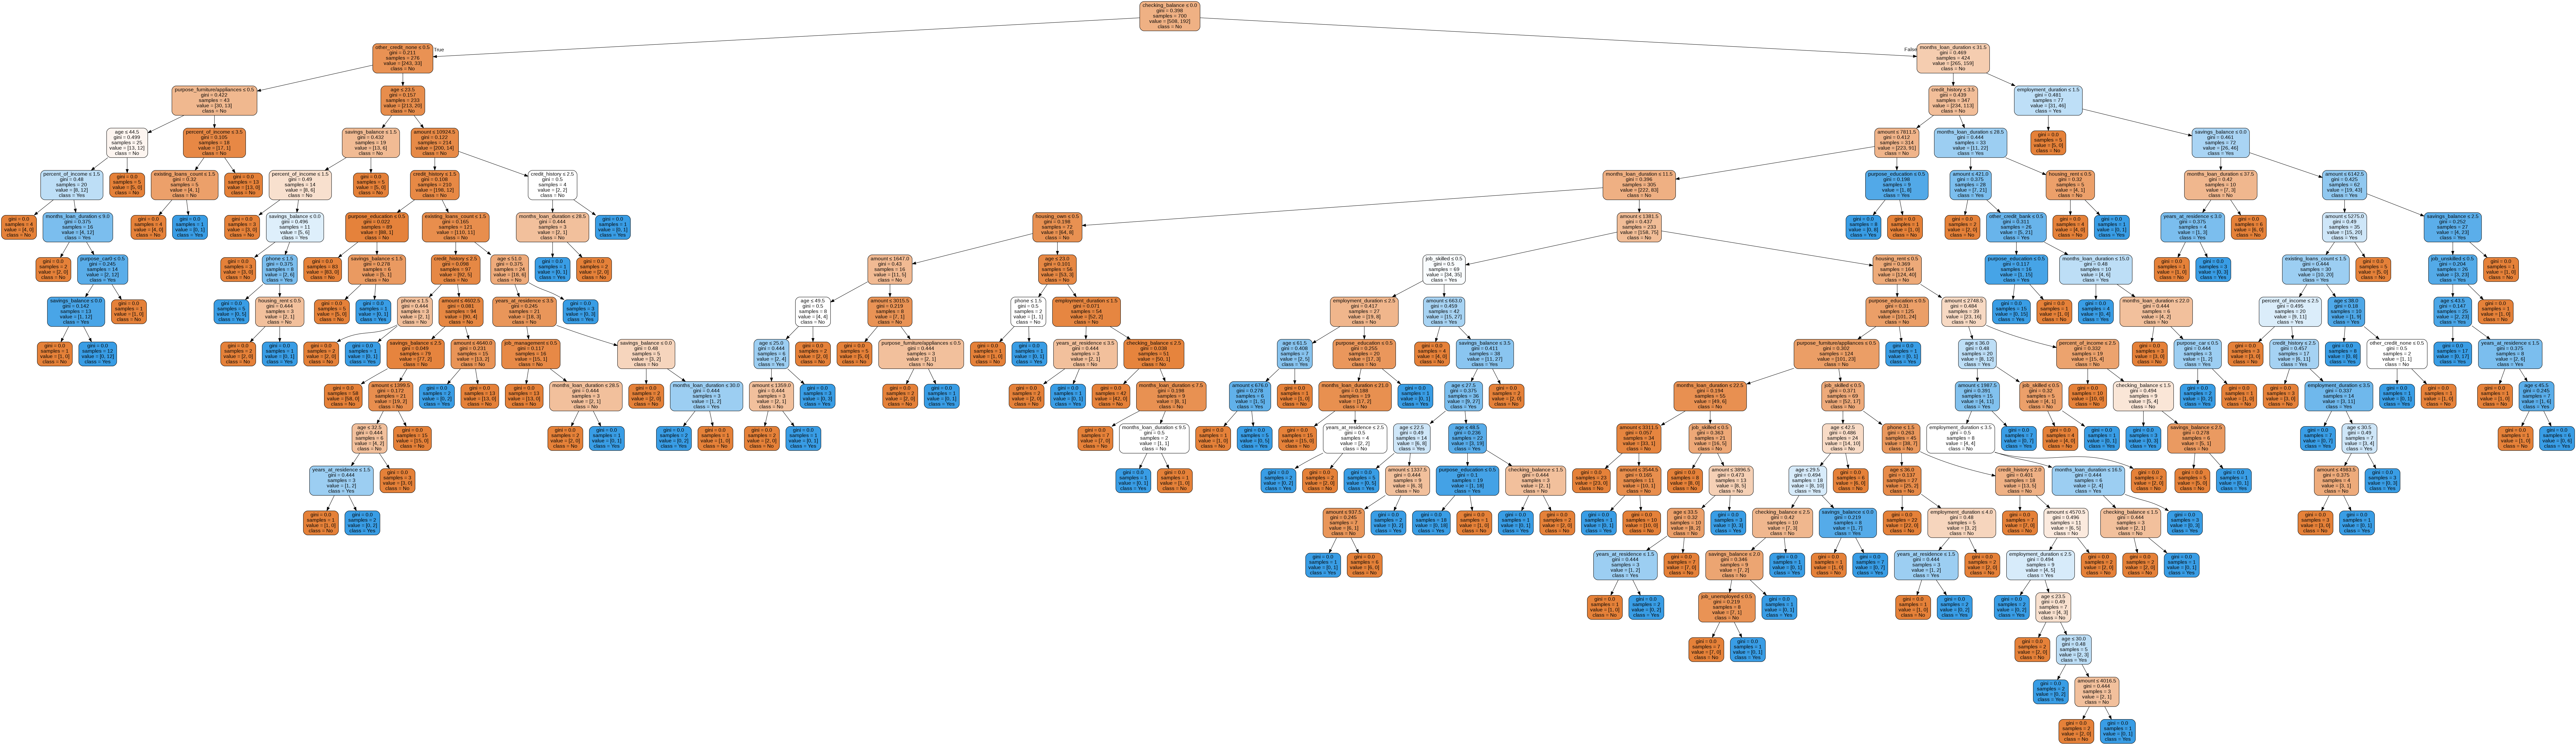

In [70]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

feat_cols=X.columns
Credit_Tree_File = StringIO()
export_graphviz(dtree,out_file=Credit_Tree_File,filled=True, rounded=True,
                special_characters=True,feature_names=feat_cols,class_names=["No","Yes"])
graph = pydotplus.graph_from_dot_data(Credit_Tree_File.getvalue())
graph.write_png('C:\\Users\\jarha\\OneDrive\\Ensemble Techniques\\Random Forest\\defaulter.png')
Image(graph.create_png())

###**Reducing overfit (Regularization)**

In [71]:
dtree1=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=20);
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

###**Calculating Score of our Optimized Model**

In [72]:
print("Training Score: ",dtree1.score(X_train,y_train))
print("Testing Score: ",dtree1.score(X_test,y_test))

Training Score:  0.7957142857142857
Testing Score:  0.7133333333333334


###**Visualization of the Decision Tree**

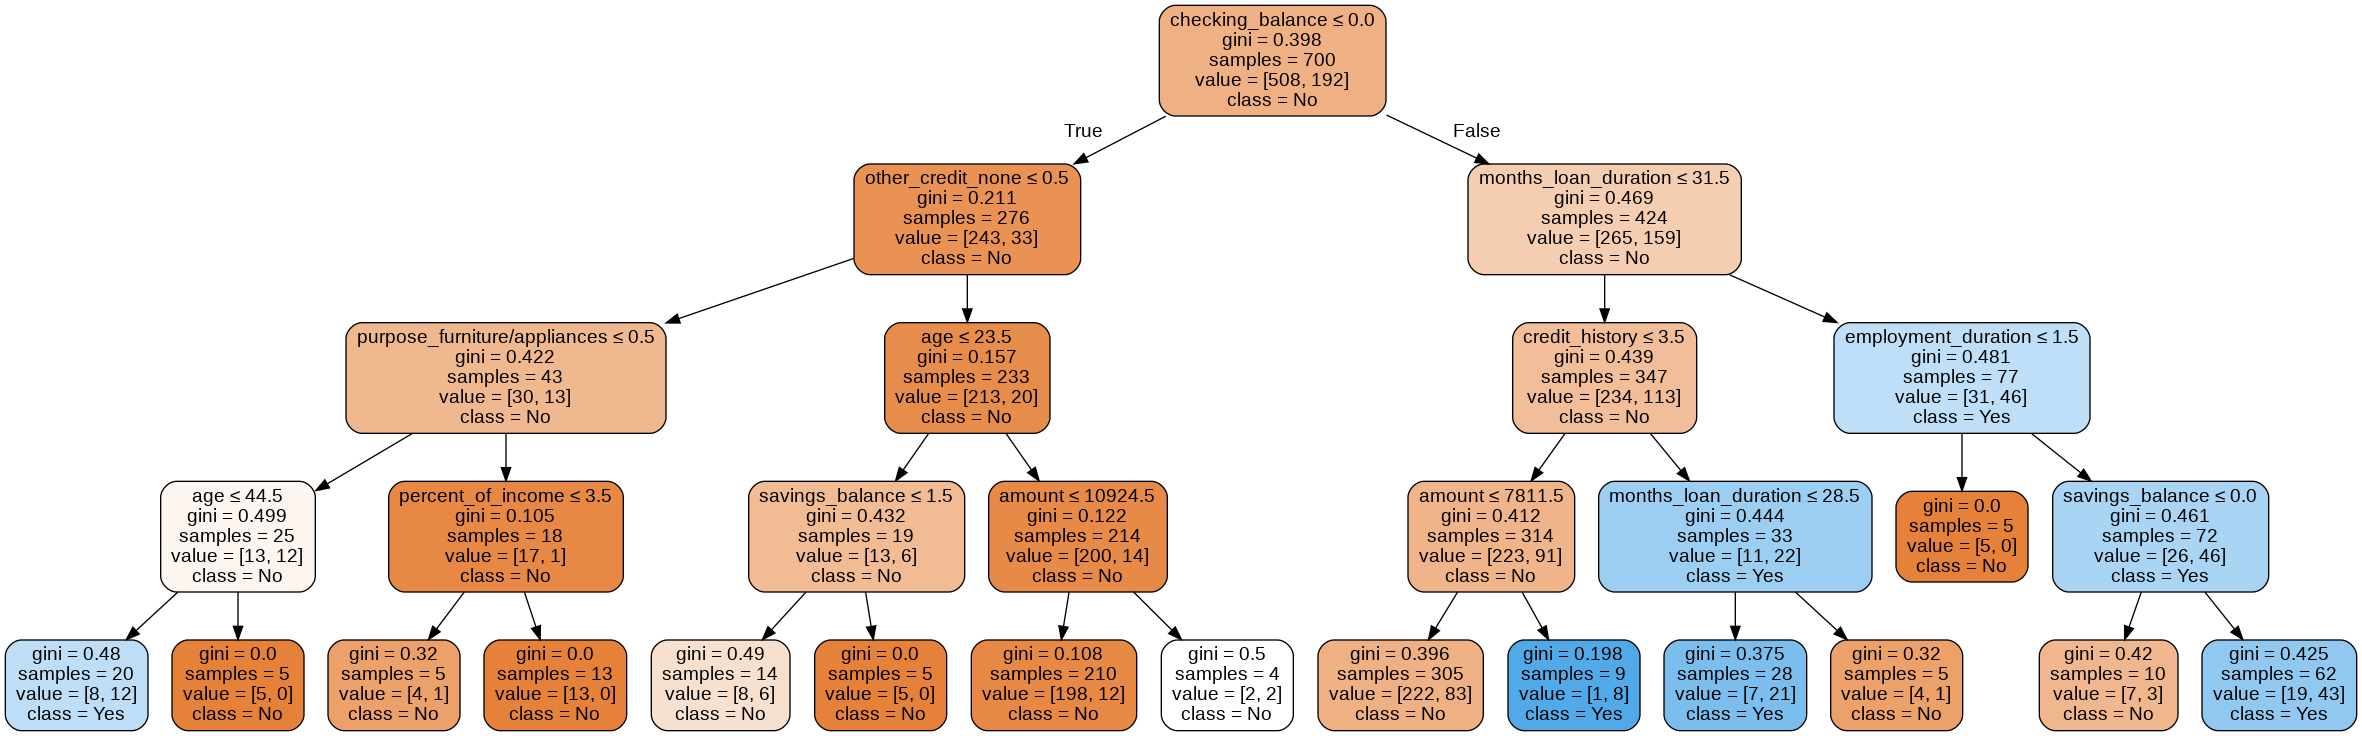

In [73]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

feat_cols=X.columns
Credit_Tree_File = StringIO()
export_graphviz(dtree1,out_file=Credit_Tree_File,filled=True, rounded=True,
                special_characters=True,feature_names=feat_cols,class_names=["No","Yes"])
graph1 = pydotplus.graph_from_dot_data(Credit_Tree_File.getvalue())
graph1.write_png('C:\\Users\\jarha\\OneDrive\\Ensemble Techniques\\Random Forest\\defaulter.png')
Image(graph1.create_png())

###**Checking the columns for feature selection**

In [74]:
data=pd.DataFrame(dtree1.feature_importances_,index=X_train.columns,columns=["Importance"])
print(data[data['Importance']>0.0])

                              Importance
checking_balance                0.308436
months_loan_duration            0.167882
credit_history                  0.119921
amount                          0.115799
savings_balance                 0.056847
employment_duration             0.053962
percent_of_income               0.004084
age                             0.071650
purpose_furniture/appliances    0.053311
other_credit_none               0.048108


###**Confusion Matrix**

0.7133333333333334


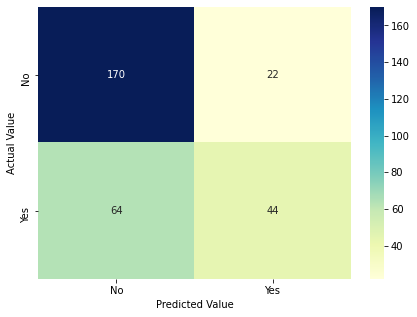

In [75]:
y_pred=dtree1.predict(X_test)
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm=pd.DataFrame(cm)
plt.figure(figsize=(7,5))
ax=sns.heatmap(data=df_cm,annot=True,fmt='g',cmap="YlGnBu");
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
print(accuracy_score(y_test,y_pred))

###**Ensemble Learning - Bagging (Parallel Model Approach)**

In [89]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=dtree,n_estimators=40,random_state=20)
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=20,
  

###**Calculating score**

In [90]:
print("Training Score: ",bag.score(X_train,y_train))
print("Testing Score: ",bag.score(X_test,y_test))

Training Score:  1.0
Testing Score:  0.7166666666666667


###**Confusion Matrix**

0.7166666666666667


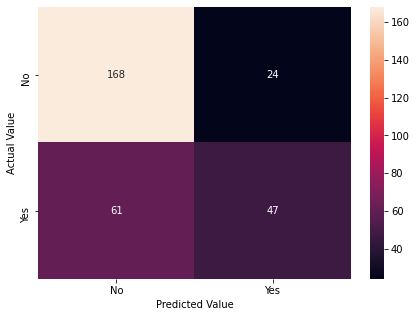

In [91]:
y_pred=bag.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(cm)
plt.figure(figsize=(7,5))
ax=sns.heatmap(data=df_cm,annot=True,fmt='g')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
print(accuracy_score(y_test,y_pred))

###**Ensemble Learning - AdaBoosting (Series Model Approach)**

In [102]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_using_complex_tree=AdaBoostClassifier(base_estimator=dtree,n_estimators=10,random_state=20)
adaboost_using_simple_tree=AdaBoostClassifier(n_estimators=10,random_state=20)
adaboost_using_complex_tree.fit(X_train,y_train)
adaboost_using_simple_tree.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=20)

###**Calculating score**

In [103]:
print("Training Score using complex tree: ",adaboost_using_complex_tree.score(X_train,y_train))
print("Testing Score using complex tree: ",adaboost_using_complex_tree.score(X_test,y_test))
print("Training Score using simple tree: ",adaboost_using_simple_tree.score(X_train,y_train))
print("Testing Score using simple tree: ",adaboost_using_simple_tree.score(X_test,y_test))

Training Score using complex tree:  1.0
Testing Score using complex tree:  0.6433333333333333
Training Score using simple tree:  0.7571428571428571
Testing Score using simple tree:  0.6766666666666666


###**Confusion Matrix**

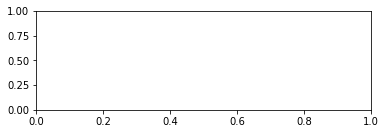

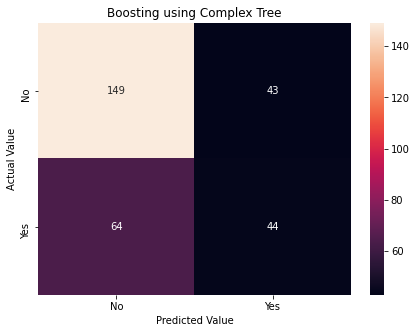

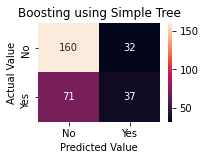

In [101]:
y_pred1=adaboost_using_complex_tree.predict(X_test)
y_pred2=adaboost_using_simple_tree.predict(X_test)
cm1=confusion_matrix(y_test,y_pred1)
cm2=confusion_matrix(y_test,y_pred2)
df_cm1=pd.DataFrame(cm1)
df_cm2=pd.DataFrame(cm2)
plt.subplot(2,1,1)
plt.figure(figsize=(7,5))
plt.title('Boosting using Complex Tree')
ax1=sns.heatmap(df_cm1,annot=True,fmt='g')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Actual Value')
ax1.xaxis.set_ticklabels(['No','Yes'])
ax1.yaxis.set_ticklabels(['No','Yes'])
plt.show()
plt.subplot(2,2,2)
plt.title('Boosting using Simple Tree')
ax=sns.heatmap(df_cm2,annot=True,fmt='g')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
plt.show()

###**Ensemble Learning - GradientBoost (Series Model Approach)**

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost=GradientBoostingClassifier(n_estimators=50,random_state=20)
gradboost.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=20, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

###**Calculating score**

In [108]:
print("Training Score: ",gradboost.score(X_train,y_train))
print("Testing Score : ",gradboost.score(X_test,y_test))

Training Score:  0.8657142857142858
Testing Score :  0.7166666666666667


###**Confusion Matrix**

0.7166666666666667


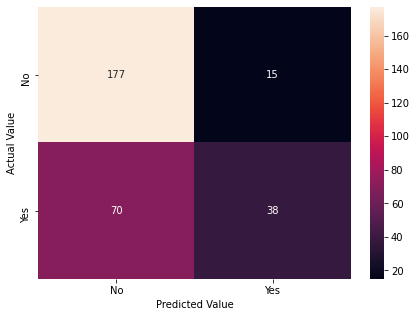

In [109]:
y_pred=gradboost.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(cm)
plt.figure(figsize=(7,5))
ax=sns.heatmap(data=df_cm,annot=True,fmt='g')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
print(accuracy_score(y_test,y_pred))

###**Ensemble Learning - Random Forest Classifier**

In [115]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=50,random_state=20,max_features=12)
forest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

###**Calculating score**

In [116]:
print("Training Score: ",forest.score(X_train,y_train))
print("Testing Score : ",forest.score(X_test,y_test))

Training Score:  1.0
Testing Score :  0.7266666666666667


###**Confusion Matrix**

0.7266666666666667


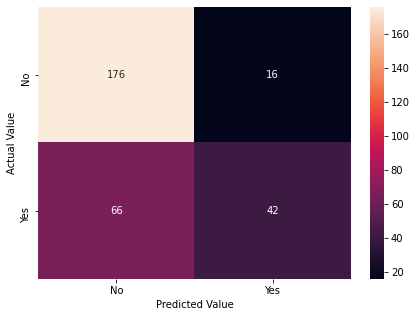

In [117]:
y_pred=forest.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(cm)
plt.figure(figsize=(7,5))
ax=sns.heatmap(data=df_cm,annot=True,fmt='g')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
print(accuracy_score(y_test,y_pred))